## Set up
__`Step 0`__ Import the needed libraries

In [965]:
#!pip install opencv-python
#!pip install keras-metrics
#!pip install spicy
#!pip install --upgrade tensorflow

## This is where we tested the 2 step Model. 

#### In Order to run this please follow the following steps:

        ## Run the imports
        ## Run the functions Download Images, then Copy Images.
        ## Create manually on your directory folders, we created them as img_3, imgPrueba, img_b, img_n, img_m
        ## Run creating_folder_test_spit()
        ## Run create_folder_3_parts()
        ## Create_Folder_Malignant()
        ## Create_Folder_B()
        ## Create_Folder_N()
        ## Run the rest of the function and then run Create_Images
        ## The inputs: Create_images(train_generator,'directory', 'train')
        ## also do it for test data. Do this for the directory for img_3, img_b, img_n, img_m
        ## The delete Image is just to delete but dont run it 
        ## Once you have all the images you can run everything in genertor sector in this same steps. This might take a lot of time. 

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import requests  
import tensorflow as tf
import seaborn as sn
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.preprocessing import image
import keras_metrics
from collections import Counter
import random
from spicy import ndimage
import imageio
from sklearn.pipeline import Pipeline

C:\Users\dggua\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import pandas as pd
import requests  
import seaborn as sn
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization,Concatenate,Input

import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models, layers, optimizers
from keras.preprocessing import image
import keras_metrics

from spicy import ndimage
import imageio

from tensorflow.keras.utils import Sequence, to_categorical

from keras.preprocessing.image import load_img, img_to_array

from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import RMSprop

__`Step 1`__  Organize the images in their respective folders

In [3]:
df = pd.read_csv("fitzpatrick17k.csv")
data = df[df['url'].notna()]
data['label'].value_counts()

####################
three_part = data['three_partition_label'].unique()
d = data.loc[data['three_partition_label']=='benign']
print(three_part)
print(d['label'].unique())

['non-neoplastic' 'benign' 'malignant']
['dermatofibroma' 'syringoma' 'prurigo nodularis' 'nevocytic nevus'
 'porokeratosis of mibelli' 'milia' 'granuloma pyogenic' 'epidermal nevus'
 'naevus comedonicus' 'pilar cyst' 'congenital nevus' 'lymphangioma'
 'pilomatricoma' 'disseminated actinic porokeratosis' 'halo nevus'
 'fordyce spots' 'telangiectases' 'becker nevus' 'pyogenic granuloma'
 'port wine stain' 'nevus sebaceous of jadassohn' 'porokeratosis actinic'
 'seborrheic keratosis' 'mucous cyst']


In [4]:
def download_images():
    for i in range(0 ,len(data)):
        url = data['url'].iloc[i]
    label = data['label'].iloc[i]
    print(i)
    if url == '0':
        print('nan image')
    else:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
        }
        data_url = requests.get(url, headers=headers).content 
        m = 'C:/Users/dggua/Documents/DeepLearning/img/img'+str(i)+'.jpg'
        m = 'C:/Users/liita/OneDrive/Documentos/Nova IMS/Deep learning/Proyecto/Prueba/'+str(label)+'/img'+str(i)+'.jpg'
        f = open(m,'bw') 
        f.write(data_url) 
        f.close() 

def copy_images(source_folder, destination_folder):
    # Get a list of files in the source folder
    files = os.listdir(source_folder)
    # Iterate over files and copy images
    for file in files:
        # Check if the file is an image (you can customize this check based on your requirements)
        if file.endswith('.jpg'):
            source_path = os.path.join(source_folder, file)
            destination_path = os.path.join(destination_folder, file)
            shutil.copy(source_path, destination_path)
            print(f"Copied '{file}' to '{destination_folder}'")

#We create a folder where we are going to get the images, and they are classified by ['non-neoplastic' 'benign' 'malignant']
def create_folder_3_parts():
    # Example usage
    parts = ['train','test','validation']
    for name in parts:
        m = 'C:/Users/dggua/Documents/DeepLearning/img_3/'+name
        os.mkdir(m)
        for i in three_part:
            d = data.loc[data['three_partition_label']==i]
            labels_unique = d['label'].unique()
            mm = m + '/'+ i
            os.mkdir(mm)
            for l in labels_unique:
                l= l.replace(" ", "_")
                source_folder = 'C:/Users/dggua/Documents/DeepLearning/img/'+ name + '/'+l
                destination_folder = mm
                copy_images(source_folder, destination_folder)
create_folder_3_parts()

Copied 'img0.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10451.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10927.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11666.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11769.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11872.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11929.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12133.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neop

Copied 'img311.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3145.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img324.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3256.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img327.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3342.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3425.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3446.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3453.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img349.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Cop

Copied 'img8465.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8540.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8614.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8825.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8920.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8970.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9003.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9067.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9104.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9140.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img13214.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13344.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13412.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13463.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1352.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13533.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13590.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13621.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13635.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1372.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-ne

Copied 'img352.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3523.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3584.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3591.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3606.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3633.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3652.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3657.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3660.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img7991.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8017.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8029.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8098.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8169.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8180.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8190.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img824.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8278.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
C

Copied 'img16363.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img16410.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img16525.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1663.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1701.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img177.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1770.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1821.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1923.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1979.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1994.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplasti

Copied 'img15460.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15581.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15830.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img16060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1841.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2119.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2207.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2402.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2437.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neopla

Copied 'img15360.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15384.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15444.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15498.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15542.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15551.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15569.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15610.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15643.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15655.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15809.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img2187.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2248.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2286.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2318.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2385.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2413.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2433.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img247.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2612.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img9811.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9862.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9918.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img999.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10041.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10069.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10672.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplast

Copied 'img12203.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12364.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12612.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1272.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1316.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1322.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1413.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1660.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2081.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplas

Copied 'img7072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7108.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7111.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7148.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7210.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7269.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7316.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7342.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7442.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img749.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img12025.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12044.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12205.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12209.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1241.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12414.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1263.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1309.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img132.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13244.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1337.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neopla

Copied 'img5649.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5835.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5857.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5912.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img602.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6026.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6049.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6185.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6258.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6281.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6337.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img6573.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img723.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7387.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7835.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8057.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img826.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8483.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9077.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
C

Copied 'img9088.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9230.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9242.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9280.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9376.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9458.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9515.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9877.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9966.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9997.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img15058.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15064.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15152.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15278.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15285.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15290.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15291.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15301.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15325.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15393.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15411.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img8140.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8195.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img825.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8267.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8584.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8652.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8661.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8818.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img5321.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img538.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5852.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6501.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7326.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7695.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img770.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8379.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8688.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
C

Copied 'img11302.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11377.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img115.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1178.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11799.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11860.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11880.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11965.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12135.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12225.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neo

Copied 'img9816.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img982.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9840.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10285.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10323.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10536.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10539.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10578.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11214.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11232.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11347.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neop

Copied 'img10211.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10245.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10310.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10427.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10643.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10746.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10755.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10885.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10886.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10967.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11127.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img7412.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7435.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7645.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7904.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8041.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8243.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8248.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8335.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8439.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img5888.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5995.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6081.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6403.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6496.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6627.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6638.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7156.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7213.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7786.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img14724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14748.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14752.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14785.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14854.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14870.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14904.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14999.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15063.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15175.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img8316.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8454.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8759.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9078.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9795.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9956.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9991.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10047.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10048.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10958.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplast

Copied 'img5909.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6186.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6813.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6887.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img731.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7327.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img1401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14028.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14306.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1433.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14558.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14813.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14959.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14992.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15120.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15485.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15685.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-ne

Copied 'img8109.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8127.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8204.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8363.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img850.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8507.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8616.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8618.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8733.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8895.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img8632.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8634.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8637.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8790.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9013.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9310.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9691.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10369.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10549.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplast

Copied 'img1092.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11140.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11390.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11791.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11794.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1190.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12093.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12338.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12356.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12814.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-ne

Copied 'img10636.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10684.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10710.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10845.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11370.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11409.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11611.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11694.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11877.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12234.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12312.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img10446.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10467.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10591.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10657.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10989.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11103.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11168.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11348.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11365.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11564.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img13101.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13212.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13245.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13286.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13317.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13477.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13758.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13775.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img13922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-n

Copied 'img7101.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7348.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7359.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7374.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img743.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7518.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7565.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7598.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7756.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img1512.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15139.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15173.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15300.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15345.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15431.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15438.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1545.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neo

Copied 'img4584.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img462.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4763.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4786.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4923.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img495.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5381.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5436.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5449.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Co

Copied 'img10511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10605.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10751.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10884.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10908.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1097.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11037.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11184.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11562.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11674.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-n

Copied 'img86.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8741.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8883.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8905.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8963.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8997.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img901.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9011.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9023.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9169.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Co

Copied 'img15113.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15203.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15258.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15264.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15305.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15377.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15514.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15594.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1564.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-n

Copied 'img6673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6701.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6735.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6738.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img714.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7193.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7211.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7275.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7352.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7480.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img9212.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9286.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img936.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9438.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10024.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10079.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10212.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1057.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10639.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11003.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11373.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neopla

Copied 'img70.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7159.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10030.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10202.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10283.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10866.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1099.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11090.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplas

Copied 'img10952.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11481.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11492.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11576.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12115.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12134.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12143.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12315.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12748.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12791.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12830.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-

Copied 'img6550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8066.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8710.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10203.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11121.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1255.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1323.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplast

Copied 'img3208.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3493.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6035.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6236.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7409.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7636.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img2941.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3438.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3629.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4340.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4481.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5078.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img5200.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img3143.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3620.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3669.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img368.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3894.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4021.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4599.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img10071.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10097.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10655.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10757.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1095.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11046.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11166.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11319.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11863.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-n

Copied 'img14447.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15905.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15980.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img168.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1935.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img220.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2320.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2602.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img280.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3325.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'

Copied 'img6469.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6481.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img6715.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7268.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7689.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8260.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8361.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8876.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9071.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img920.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img2971.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3347.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img374.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3999.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4449.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4501.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4677.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4708.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img13881.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14167.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img14235.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img15704.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1716.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img269.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img2785.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img3709.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img396.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img4244.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplasti

Copied 'img9079.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9236.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11583.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1243.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12657.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12875.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12896.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12958.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img12965.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img1315.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neop

Copied 'img7741.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img7841.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8103.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8591.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8629.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img892.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9308.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9350.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9522.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9557.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'


Copied 'img856.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8588.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img8888.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9317.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9526.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img9826.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10150.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img10300.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplastic'
Copied 'img11806.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/non-neoplasti

Copied 'img1396.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img14100.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img14489.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img1487.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img15683.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2442.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2896.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4198.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4538.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4620.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img504.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5113.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Co

Copied 'img9298.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9872.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9941.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9945.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img10170.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img10444.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img10727.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img10959.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img11175.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img11190.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign

Copied 'img344.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3470.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3519.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3708.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5440.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5726.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6043.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6467.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6497.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6747.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6762.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copie

Copied 'img6020.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img685.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6908.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7451.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7471.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7520.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7672.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img774.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img8245.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img8256.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img8272.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img8435.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied

Copied 'img5780.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img614.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img6725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7059.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img7958.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img866.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img8846.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9476.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img9509.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied

Copied 'img201.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2098.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2620.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3130.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3315.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img389.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img424.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4450.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4486.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4487.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4715.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 

Copied 'img2162.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img221.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2226.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2397.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2454.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2499.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2563.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2580.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2762.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2970.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3176.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copie

Copied 'img12628.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img1345.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img254.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3336.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3651.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4018.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4391.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4499.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4702.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5416.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5664.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copi

Copied 'img16309.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img16464.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img16528.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img2732.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3077.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3129.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img3284.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img357.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4531.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img4697.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Copied 'img5250.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/benign'
Co

Copied 'img11142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11171.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11263.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11359.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11413.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11448.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11580.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12342.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12416.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12609.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12749.jpg' to 'C:/Users/dggua/Docu

Copied 'img1182.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11919.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img11966.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12277.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12321.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12334.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12351.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12372.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12420.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12429.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img12526.jpg' to 'C:/Users/dggua/Doc

Copied 'img7317.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7398.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img757.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7693.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7844.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7845.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7887.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img792.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8225.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8280.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8348.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8391.jpg' to 'C:/Users/dggua/Documents/DeepLe

Copied 'img7544.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7685.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8223.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8279.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8375.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8493.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8576.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8607.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8617.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img8714.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9075.jpg' to 'C:/Users/dggua/Documents/DeepL

Copied 'img15108.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15114.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15121.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15145.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15206.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15227.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15238.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15242.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15244.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img15249.jpg' to 'C:/Users/dggua/Do

Copied 'img7051.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7113.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7173.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7296.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7355.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7479.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7572.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7616.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7721.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7862.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7937.jpg' to 'C:/Users/dggua/Documents/Deep

Copied 'img13205.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13362.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13390.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13480.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13495.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13545.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13609.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13862.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13940.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img13948.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img14003.jpg' to 'C:/Users/dggua/Doc

Copied 'img4987.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img562.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img5871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6405.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6436.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img653.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6677.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6750.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6783.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img6970.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img7022.jpg' to 'C:/Users/dggua/Documents/DeepLe

Copied 'img16065.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16067.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16108.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16150.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16158.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16160.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16172.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16200.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16210.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16224.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img16231.jpg' to 'C:/Users/dggua/Do

Copied 'img9341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9368.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9536.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9549.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9737.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9812.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9861.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9896.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9903.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img9951.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img10006.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1035.jpg' to 'C:/Users/dggua/Documents/Dee

Copied 'img1515.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1739.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1740.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img1916.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2035.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2104.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2515.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2645.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img2810.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/train/malignant'
Copied 'img3044.jpg' to 'C:/Users/dggua/Documents/Deep

Copied 'img6675.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6686.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6842.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6881.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6911.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7126.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7360.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img768.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7688.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img

Copied 'img7318.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7367.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7475.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img751.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7627.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7819.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7971.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8170.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8182.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8199.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8427.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img

Copied 'img2268.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2356.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img285.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2948.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3520.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img387.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img415.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img469.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img474.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5866.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5959

Copied 'img4820.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4823.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4897.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4969.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5004.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5162.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5201.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5407.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5412.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5438.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img548.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img

Copied 'img1013.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10155.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10496.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1056.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1101.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11084.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11378.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11508.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11575.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Co

Copied 'img12711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13436.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13468.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13530.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13565.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13835.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13880.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14117.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14338.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14571.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14905.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'

Copied 'img8552.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img9635.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img9971.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1198.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img12283.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13001.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2517.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2520.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3544.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3873.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4022.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied '

Copied 'img13779.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14434.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14717.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img15843.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img15876.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16017.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16084.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16188.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16377.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'

Copied 'img8672.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img9268.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img956.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img9724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10002.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11025.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11067.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img12073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2989.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3615.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4516.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 

Copied 'img16501.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16517.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1767.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2183.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3349.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3680.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4428.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5269.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5985.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6457.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8803.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied '

Copied 'img13514.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13577.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14065.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14351.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14456.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1781.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1797.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1984.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2357.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2518.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2621.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copie

Copied 'img6399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6671.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6867.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7344.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7376.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img780.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8092.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8238.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8570.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img861.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8

Copied 'img5920.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6420.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6445.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6582.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6790.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7585.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7633.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7714.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'im

Copied 'img9787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10274.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10351.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10503.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11324.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11739.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11750.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img15650.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img15894.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2321.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3262.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Co

Copied 'img12077.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img121.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img12599.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1262.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1432.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1616.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img252.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2662.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3175.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3449.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3811.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'im

Copied 'img1874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3230.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3853.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6123.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6863.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6933.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img7390.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img8064.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img9742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img10057.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'im

Copied 'img15110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1607.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img3307.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img4228.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img563.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img5887.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img6341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'im

Copied 'img10925.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1122.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11463.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img12678.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13522.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14079.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14237.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14397.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img15208.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'


Copied 'img7882.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img1112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img11402.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img12583.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13061.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13348.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img13833.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img14731.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16052.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img16511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Copied 'img2174.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/non-neoplastic'
Co

Copied 'img2545.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img3420.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img3885.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img6727.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img694.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img7552.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img7748.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img8331.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img9081.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img9202.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img995.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img12074.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img14262.

Copied 'img9073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img10183.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img10488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img12128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img12273.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img1552.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img2158.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img2358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img3693.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img4230.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img6903.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img7911.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img8

Copied 'img8578.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img9006.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img975.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img9868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img11333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img11855.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img12505.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img1254.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img2436.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img2808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img4213.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img4812.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/benign'
Copied 'img484

Copied 'img13257.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13261.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13305.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img1349.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13498.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13601.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img137.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13728.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13807.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13870.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13890.jpg' to 'C:/Users/dggua/Documents/DeepLe

Copied 'img13581.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13600.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13627.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13662.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13764.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13844.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13863.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13906.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img13933.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img14083.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img14090.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/test/malignant'
Copied 'img14116.jpg' to 'C:/Users/dggua/Documents/Dee

Copied 'img12839.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12956.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13745.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13921.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15832.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15928.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1760.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img190.jpg' to 'C:/Users/

Copied 'img9963.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img9970.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10137.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10708.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10750.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11016.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1154.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11605.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11949.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12132.jpg' to 'C:/User

Copied 'img10205.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10799.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10917.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11079.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11309.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11458.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11470.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11658.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11703.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11712.jpg' to 'C:/Use

Copied 'img1364.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14263.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14354.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15176.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1549.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1963.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3065.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3278.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3610.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3732.jpg' to 'C:/Users/dg

Copied 'img12047.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12075.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1714.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2378.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3146.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4916.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img579.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8262.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img9085.jpg' to 'C:/Users/dggua

Copied 'img15631.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16043.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16412.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1840.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2301.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img24.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2465.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2473.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2577.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2691.jpg' to 'C:/Users/dggua

Copied 'img10414.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10509.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12790.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12929.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13660.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14092.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15287.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15423.jpg' to 'C:/U

Copied 'img10065.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10371.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10592.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1089.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11708.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1265.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13810.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1390.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13900.jpg' to 'C:/Users

Copied 'img15572.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15628.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15674.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15799.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15941.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15960.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15966.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16106.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16211.jpg' to 'C:/U

Copied 'img14070.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14663.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1882.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2791.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3133.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3280.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3903.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img6220.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7562.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8373.jpg' to 'C:/Users/dggu

Copied 'img13074.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13194.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13502.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13763.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13840.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1415.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14204.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14274.jpg' to 'C:/Us

Copied 'img13883.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13926.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14078.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14151.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14378.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14420.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14503.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img14577.jpg' to 'C:/U

Copied 'img16138.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16214.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16234.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1686.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2235.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2918.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3285.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3319.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4062.jpg' to 'C:/Users/dgg

Copied 'img417.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4304.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img473.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4758.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img6800.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7096.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7859.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7951.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8083.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8114.jpg' to 'C:/Users/dggua/Do

Copied 'img9256.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10182.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11305.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11824.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12966.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15901.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16440.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2163.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img5794.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7023.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7220.jpg' to 'C:/Users/

Copied 'img12881.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13617.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15085.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16091.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img16502.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4367.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img5501.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img6021.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img9455.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img9820.jpg' to 'C:/Users/d

Copied 'img14372.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15211.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15478.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1584.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2140.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2698.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2856.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img2986.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4319.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img5257.jpg' to 'C:/Users/dgg

Copied 'img11661.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3507.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3574.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img3813.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img386.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img4585.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img5365.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img5377.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img6934.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7619.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img8339.jpg' to 'C:/Users/dggua/

Copied 'img7528.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img7663.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img9321.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img993.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img10243.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img11300.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img12545.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img13134.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img1422.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/non-neoplastic'
Copied 'img15092.jpg' to 'C:/Users/d

Copied 'img1778.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img1816.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img2088.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img4547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img47.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img5447.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img7312.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img7624.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img8347.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img8704.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img9125.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img9227.jpg' to 'C:/Users/

Copied 'img9704.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img11873.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img1575.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img2425.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img3022.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img3296.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img3559.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img4510.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img5110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img5414.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img5434.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img6041.jpg' to 'C:/Use

Copied 'img10593.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img11912.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img12017.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img2031.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img2216.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img2977.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img3069.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img5103.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img671.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img7817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img9720.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/benign'
Copied 'img11638.jpg' to 'C:/U

Copied 'img13625.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img13893.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img14271.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img15146.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img15389.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img15527.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img1586.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img16143.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img16455.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img2114.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img2534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/ma

Copied 'img9835.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10293.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10339.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10468.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10608.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10617.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10853.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11193.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11921.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img1200.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/m

Copied 'img10725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10803.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img10861.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11665.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11719.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11752.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11819.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11842.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img11864.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img12012.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation/malignant'
Copied 'img12172.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_3/validation

In [5]:
#Create a folder for malignant seperation
def Create_Folder_Malignant():
    parts = ['train','test','validation']
    for name in parts:
        m = 'C:/Users/dggua/Documents/DeepLearning/img_m/'+name
        os.mkdir(m)
        d = data.loc[data['three_partition_label']=='malignant']
        labels_unique = d['label'].unique()

        for l in labels_unique:
            l= l.replace(" ", "_")
            mm = m + '/'+ l
            os.mkdir(mm)
            source_folder = 'C:/Users/dggua/Documents/DeepLearning/img/'+ name + '/'+l
            destination_folder = mm
            copy_images(source_folder, destination_folder)
Create_Folder_Malignant()

Copied 'img1001.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img10711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img10910.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11171.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11263.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11359.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11413.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11448.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_sarcoma'
Copied 'img11580.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/kaposi_

Copied 'img11259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11284.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11375.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11455.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11529.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11735.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img1182.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11919.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img11966.jpg' to 'C:/Users/dggua/Documents/Deep

Copied 'img4259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img4284.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img4330.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img4723.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img486.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img4860.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img525.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img526.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img5392.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img5819.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img5829.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/melanoma'
Copied 'img5830.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m

Copied 'img5088.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5156.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5396.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5422.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5505.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5662.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5779.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5795.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img5801.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis'
Copied 'img6008.jpg' to 'C:/Users/dggua/Documents/DeepLearni

Copied 'img14216.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14233.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14243.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14253.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14292.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14298.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14442.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14505.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14511.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14553.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img14591.jpg

Copied 'img16089.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16118.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16127.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16177.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16239.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16273.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16283.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16311.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16317.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img16384.jpg

Copied 'img7937.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img7955.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img8307.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img851.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img8656.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img873.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img8924.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img902.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img9029.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img9094.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma'
Copied 'img9146.jpg' to 'C:/Users

Copied 'img13948.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img1395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14003.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14015.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14120.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14215.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14389.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14415.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14457.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14576.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/mycosis_fungoides'
Copied 'img14597.jpg' to 'C:/Users/dggua/Documents/

Copied 'img4144.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img4373.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img4987.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img562.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img5871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img6405.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img6436.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img653.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Copied 'img6677.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/superficial_spreading_melanoma_ssm'
Cop

Copied 'img12849.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img12882.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img12938.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img12977.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img13042.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img13072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img13088.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1311.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img13136.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img13153.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_ca

Copied 'img1650.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1675.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1719.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1735.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img178.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1814.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img183.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1932.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img1997.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img2008.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Co

Copied 'img6007.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6092.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6152.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6275.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6380.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6442.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6494.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'
Copied 'img6514.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/squamous_cell_carcinoma'


Copied 'img5055.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img5374.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img5607.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img5702.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img5753.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img5910.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img6226.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img6348.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img6744.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img675.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentigo_maligna'
Copied 'img7198.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/lentig

Copied 'img4061.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img4185.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img4235.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img4351.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img4529.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img465.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img4716.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img492.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img5241.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img5259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/train/malignant_melanoma'
Copied 'img5351.jpg' to 'C:/Users/dggua/Documents/De

Copied 'img13889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img13890.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img13899.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14056.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14157.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14197.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14260.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14429.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14504.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14560.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/basal_cell_carcinoma'
Copied 'img14608.jpg' to 'C:/U

Copied 'img7659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/mycosis_fungoides'
Copied 'img8942.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/mycosis_fungoides'
Copied 'img9668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/mycosis_fungoides'
Copied 'img9990.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/mycosis_fungoides'
Copied 'img10516.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/superficial_spreading_melanoma_ssm'
Copied 'img10609.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/superficial_spreading_melanoma_ssm'
Copied 'img11594.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/superficial_spreading_melanoma_ssm'
Copied 'img11736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/superficial_spreading_melanoma_ssm'
Copied 'img12267.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/superficial_spreading_melanoma_ssm'
Copied 'img12398.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/tes

Copied 'img5598.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img5638.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img6064.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img7012.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img7167.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img7381.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img7495.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img7655.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img8042.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'img8112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/test/squamous_cell_carcinoma'
Copied 'im

Copied 'img14399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15376.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15531.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15623.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15837.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15838.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img15981.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img16053.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img16217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'
Copied 'img16260.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/melanoma'

Copied 'img15762.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img15810.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img15856.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img15906.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16107.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16320.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16373.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16513.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/basal_cell_carcinoma'
Copied 'img16524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/val

Copied 'img10407.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img10725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img10803.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img10861.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11665.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11719.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11752.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11819.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11842.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/squamous_cell_carcinoma'
Copied 'img11864.jpg' to 'C:/Users/dggua/Docum

Copied 'img5171.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img5677.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img5886.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img6621.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img6886.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img7980.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img8581.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img9083.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/lentigo_maligna'
Copied 'img10161.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/solid_cystic_basal_cell_carcinoma'
Copied 'img10374.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_m/validation/solid_cystic_basal_cell_car

In [6]:
#Create a folder for 'benign' seperation
def Create_Folder_B():
    parts = ['train','test','validation']
    for name in parts:
        m = 'C:/Users/dggua/Documents/DeepLearning/img_b/'+name
        os.mkdir(m)
        d = data.loc[data['three_partition_label']=='benign']
        labels_unique = d['label'].unique()

        for l in labels_unique:
            l= l.replace(" ", "_")
            mm = m + '/'+ l
            os.mkdir(mm)
            source_folder = 'C:/Users/dggua/Documents/DeepLearning/img/'+ name + '/'+l
            destination_folder = mm
            copy_images(source_folder, destination_folder)
            
 #Create a folder for non-neoplastic' seperation
def Create_Folder_N():
    parts = ['train','test','validation']
    for name in parts:
        m = 'C:/Users/dggua/Documents/DeepLearning/img_N/'+name
        os.mkdir(m)
        d = data.loc[data['three_partition_label']=='non-neoplastic']
        labels_unique = d['label'].unique()

        for l in labels_unique:
            l= l.replace(" ", "_")
            mm = m + '/'+ l
            os.mkdir(mm)
            source_folder = 'C:/Users/dggua/Documents/DeepLearning/img/'+ name + '/'+l
            destination_folder = mm
            copy_images(source_folder, destination_folder)
                       
Create_Folder_B()
Create_Folder_N()

Copied 'img10121.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img10255.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img10403.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img10747.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img11036.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img1104.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img1164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img11854.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img12346.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img12549.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermatofibroma'
Copied 'img12638.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/dermat

Copied 'img3924.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img43.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img4441.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img4949.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img4982.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5239.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5604.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5648.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5759.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img5834.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/syringoma'
Copied 'img6679.jpg' to 'C:/Users/dggua/Documents/DeepLe

Copied 'img6940.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img6952.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img7535.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img7553.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img7566.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img7983.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img8099.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img8523.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img8677.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img9027.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/prurigo_nodularis'
Copied 'img9244.jpg' to 'C:/Users/dggua/Documents/DeepLearni

Copied 'img9196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img9325.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img9440.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img9796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img9889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img9959.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_of_mibelli'
Copied 'img10116.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/milia'
Copied 'img1129.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/milia'
Copied 'img11329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/milia'
Copied 'img11401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/milia'
Copied 'img11822.jpg' to 'C:/Users/dggua/Documents/DeepLearning

Copied 'img5503.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img6114.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img6327.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img646.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img7478.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img8108.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img9696.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img9763.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/granuloma_pyogenic'
Copied 'img10027.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/epidermal_nevus'
Copied 'img10042.jpg' to 'C:/Users/dggua/Documents/Dee

Copied 'img5011.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5411.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img546.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5514.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5552.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5612.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img5780.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img6087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img614.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/congenital_nevus'
Copied 'img6725.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/tra

Copied 'img3603.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img3699.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img3994.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img3995.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img4288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img4454.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img4600.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img4905.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
Copied 'img5012.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/disseminated_actinic_porokeratosis'
C

Copied 'img635.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img6555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img6655.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img6811.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7155.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7393.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7682.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7697.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7775.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img7846.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img8056.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/fordyce_spots'
Copied 'img

Copied 'img4171.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img4358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img4494.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img4548.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img4701.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img4908.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img5015.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img5033.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img5076.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img535.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/pyogenic_granuloma'
Copied 'img5559.jpg' to 'C:/Users/dggua/Documents/D

Copied 'img13798.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13814.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13855.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13931.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13942.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13955.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img13983.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img14016.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img14046.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'img14089.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/porokeratosis_actinic'
Copied 'im

Copied 'img10642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img10856.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img11059.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img11176.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img11596.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img12401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img13010.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img13169.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img14153.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img14479.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img14526.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/train/mucous_cyst'
Copied 'img14798.jpg'

Copied 'img11239.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img11445.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img1492.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img1571.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img15903.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img3786.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img4378.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img5228.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img6387.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img6656.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nevus'
Copied 'img7200.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/epidermal_nev

Copied 'img7462.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/pilomatricoma'
Copied 'img8664.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/pilomatricoma'
Copied 'img9073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/pilomatricoma'
Copied 'img10183.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img10488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img12128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img12273.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img1552.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img2158.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/disseminated_actinic_porokeratosis'
Copied 'img2358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/

Copied 'img6326.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/seborrheic_keratosis'
Copied 'img7737.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/seborrheic_keratosis'
Copied 'img9086.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/seborrheic_keratosis'
Copied 'img12221.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img13607.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img1521.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img16482.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img2113.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img2144.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img2468.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img2516.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/test/mucous_cyst'
Copied 'img26

Copied 'img10230.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img10697.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img11269.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img11910.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img12024.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img12360.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img2601.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img2658.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img3537.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img3938.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img4356.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/milia'
Copied 'img4415.jpg' to 'C:/Users/dgg

Copied 'img2743.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img3538.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img3860.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img4146.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img4465.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img4901.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img5112.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img5495.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img6566.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img7469.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/lymphangioma'
Copied 'img7567.jpg' to 'C:/Users/dggua/Documents/DeepLearni

Copied 'img12037.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img2549.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img2736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img3054.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img4401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img4972.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img5019.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img5295.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img5565.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'
Copied 'img6465.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/pyogenic_granuloma'

Copied 'img6271.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/mucous_cyst'
Copied 'img7540.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/mucous_cyst'
Copied 'img7675.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/mucous_cyst'
Copied 'img9727.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_b/validation/mucous_cyst'
Copied 'img0.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induced_pigmentary_changes'
Copied 'img10451.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induced_pigmentary_changes'
Copied 'img10668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induced_pigmentary_changes'
Copied 'img10724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induced_pigmentary_changes'
Copied 'img10742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induced_pigmentary_changes'
Copied 'img10927.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/drug_induce

Copied 'img4399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4407.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4411.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4526.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4551.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4633.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4645.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4651.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4652.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4712.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photodermatoses'
Copied 'img4732.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/photo

Copied 'img1033.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10335.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10411.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10448.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img1046.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10540.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10610.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10613.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10635.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img10677.jpg' to 'C:/Users/dggua/Docu

Copied 'img14392.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14412.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img1447.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14559.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14627.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14661.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14664.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14709.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14711.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14776.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img14814.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img1500.jpg' to 'C:/Users/dggua/Docu

Copied 'img5493.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img55.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img56.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5704.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5741.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5762.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img577.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5774.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5807.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/psoriasis'
Copied 'img5899.jpg' to 'C:/Users/dggua/Documents/DeepLearn

Copied 'img12733.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img12779.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img12796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img12963.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img12973.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img12983.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img13024.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img13085.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img13086.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img13102.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_de

Copied 'img828.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8414.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8476.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8479.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8585.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8589.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img889.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8916.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Copied 'img8939.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neutrophilic_dermatoses'
Co

Copied 'img3498.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img3576.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img3780.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img3817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4338.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4392.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img451.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4826.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/granuloma_annulare'
Copied 'img4885.jpg' to 'C:/Users/dggua/Documents/D

Copied 'img13139.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13204.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13233.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13237.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13439.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13492.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13556.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img13591.jpg' to 'C:/Users/dggua

Copied 'img7106.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7188.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7241.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7397.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7419.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img7523.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img791.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img8128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img8134.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/nematode_infection'
Copied 'img8291.jpg' to 'C:/Users/dggua/Documents/D

Copied 'img15019.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15526.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15694.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15786.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15804.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15822.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img1587.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15900.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img15933.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img1598.jpg' to 'C:/Users/dggua/Documents/DeepLe

Copied 'img5722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5749.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5784.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5802.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5881.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5892.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img5926.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/allergic_contact_dermatitis'
Copied 'img605.jpg' to 'C:/Users/dggua/Documents/DeepLearning/im

Copied 'img10.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10041.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10069.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10672.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10849.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10903.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img10919.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/necrobiosis_lipoidica'
Copied 'img11

Copied 'img10825.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img10837.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img10878.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img10904.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img1093.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img10934.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img10964.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img11120.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img11137.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img11312.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img11318.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'


Copied 'img7568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img7599.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img7736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img7771.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img778.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img7896.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img796.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img803.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img8032.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img8044.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img8124.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acne_vulgaris'
Copied 'img82

Copied 'img2906.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3002.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img307.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3297.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3367.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3451.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3491.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3571.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3694.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3698.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3700.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sarcoidosis'
Copied 'img3808.jpg' to 'C:/Users

Copied 'img826.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img8395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img8483.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img9077.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img9087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img9149.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img9953.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xeroderma_pigmentosum'
Copied 'img10018.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img10260.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img10297.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img10312.jpg' to 'C:/Users/dggua/Documen

Copied 'img760.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img7646.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img7915.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img7925.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8004.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8159.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8167.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8209.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8301.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8328.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8368.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleroderma'
Copied 'img8385.jpg' to 'C:/Users

Copied 'img408.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4314.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4604.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4625.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4642.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4658.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4752.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4904.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img4991.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/folliculitis'
Copied 'img5429.jpg' t

Copied 'img3573.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img3593.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img3605.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img392.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img4154.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img4524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img4883.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img5734.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img5896.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_lichenoides_chronica'
Copied 'img6809.jpg' to 'C:/U

Copied 'img16157.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img16287.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img16292.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img1755.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img1829.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img1895.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img2230.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img2249.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img235.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img2476.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/seborrheic_dermatitis'
Copied 'img3095.jp

Copied 'img12292.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img12808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img12995.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13040.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13135.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13146.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13268.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13299.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13328.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13353.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img13369.jpg' to 'C:/Users/dggua/Documents

Copied 'img9687.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img9701.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img9736.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img9855.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurofibromatosis'
Copied 'img10211.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10245.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10310.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10427.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10643.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10746.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10755.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/eczema'
Copied 'img10885.jpg' to 'C:/Users/d

Copied 'img13943.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img13957.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img13966.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img13969.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14047.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14061.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14219.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14484.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14501.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pediculosis_lids'
Copied 'img14618.jpg' to 'C:/Users/dggua/Documents/DeepLearn

Copied 'img15525.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15536.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15706.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15709.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15770.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15961.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15969.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rubra_pilaris'
Copied 'img15999.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityri

Copied 'img6105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img6186.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img6668.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img6813.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img6887.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img6922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img7196.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img7229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img731.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img7327.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pityriasis_rosea'
Copied 'img7453.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/tr

Copied 'img13657.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img1368.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img13854.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img13928.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img1398.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img14007.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img1401.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img14028.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img14306.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img1433.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_multiforme'
Copied 'img14558.jpg' to 'C:/Users

Copied 'img13993.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14017.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14173.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14355.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14384.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14424.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14665.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14757.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14788.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acrodermatitis_enteropathica'
Copied 'img14939.jpg' to 'C:/Users/dggua/Docum

Copied 'img7719.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img7745.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img7847.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img7871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img7990.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img8072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img8078.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img8599.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img88.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img9062.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatomyositis'
Copied 'img910.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dermatom

Copied 'img2363.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2543.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2590.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2644.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2749.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2829.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img2861.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img3062.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img383.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img4249.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img4398.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/vitiligo'
Copied 'img4707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img

Copied 'img13212.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13245.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13286.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13317.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img1341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13477.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13758.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13775.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img13958.jpg' to 'C:/Us

Copied 'img8040.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8052.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img806.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8287.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8398.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8422.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8474.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img855.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8564.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lupus_erythematosus'
Copied 'img8671.jpg' to 'C:/Users/dggua/Doc

Copied 'img15054.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15061.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img1512.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15139.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15173.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img1524.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15300.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15345.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img15431.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
C

Copied 'img9928.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img9977.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_planus'
Copied 'img10015.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img10504.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img11395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img11747.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img12137.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img12595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img1784.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img2052.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/sun_damaged_skin'
Copied 'img2302.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/t

Copied 'img11116.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11139.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11252.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11356.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11631.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11706.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11723.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img11858.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img12016.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img12233.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img12271.jpg' to 'C:/Users/dggua/Documents/DeepLearning/i

Copied 'img8019.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img8086.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img8107.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img811.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img8434.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img8561.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img8644.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img9054.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img9098.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img9314.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img9513.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scabies'
Copied 'img96.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scab

Copied 'img4179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img4698.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img4868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img5554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img6252.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img6374.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img6534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img70.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img7159.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img871.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/behcets_disease'
Copied 'img10030.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenil

Copied 'img8800.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img8844.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img8853.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img8945.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9069.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9179.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9366.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9425.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9485.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthogranuloma'
Copied 'img9587.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/juvenile_xanthog

Copied 'img8702.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img8822.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img8849.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img8859.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img9301.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img9600.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/papilomatosis_confluentes_and_reticulate'
Copied 'img10343.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurotic_excoriations'
Copied 'img10391.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurotic_excoriations'
Copied 'img10827.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurotic_excoriations'
C

Copied 'img6550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_annulare_centrifigum'
Copied 'img7399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_annulare_centrifigum'
Copied 'img8066.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_annulare_centrifigum'
Copied 'img8710.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_annulare_centrifigum'
Copied 'img9550.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/erythema_annulare_centrifigum'
Copied 'img10203.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pustular_psoriasis'
Copied 'img10490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pustular_psoriasis'
Copied 'img11121.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pustular_psoriasis'
Copied 'img1191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pustular_psoriasis'
Copied 'img1255.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/pustular_pso

Copied 'img2839.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img302.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img306.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img3064.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img3087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img3169.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img3208.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img3493.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img4294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img4555.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img5191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied 'img5333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/striae'
Copied

Copied 'img2941.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img3438.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img3629.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img3787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img4105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img4340.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img4481.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img4673.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img5060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img5078.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neurodermatitis'
Copied 'img5200.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/neuro

Copied 'img292.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3143.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3288.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3620.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3669.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img368.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3868.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img3894.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img4021.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img4060.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img4488.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied 'img4599.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/keloid'
Copied

Copied 'img1593.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2057.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2882.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img3331.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img3333.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img3858.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img4153.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/acquired_autoim

Copied 'img13709.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13789.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13790.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13827.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13858.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img13914.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img14145.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img14177.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img14335.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/dariers_disease'
Copied 'img145.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/tr

Copied 'img8910.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_simplex'
Copied 'img8922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_simplex'
Copied 'img9927.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/lichen_simplex'
Copied 'img1005.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img10229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img10577.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img11222.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img1153.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img12189.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img12379.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/perioral_dermatitis'
Copied 'img172.jpg' to 'C:/Users/dggua/Documents/D

Copied 'img2498.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img2538.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img2669.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img3157.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img3394.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img3717.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img4749.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img5217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img5553.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img6206.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'img6352.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/aplasia_cutis'
Copied 'im

Copied 'img6335.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img6485.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img6696.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img7266.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img7606.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img8423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img9922.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/paronychia'
Copied 'img12460.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/langerhans_cell_histiocytosis'
Copied 'img12621.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/langerhans_cell_histiocytosis'
Copied 'img12916.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/langerhans_cell_histiocytosis'
Copied 'img13980.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/

Copied 'img11987.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img12223.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img1639.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img2278.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img281.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img3105.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img3369.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img3810.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img4568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img4992.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img5170.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/xanthomas'
Copied 'img5755.jpg' to 'C:/Users/dggua/Documents/Dee

Copied 'img5064.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img5142.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img515.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img5296.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img574.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img5954.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img6138.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img6259.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img6294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img7467.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
Copied 'img8227.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/scleromyxedema'
C

Copied 'img15815.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16146.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16247.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16274.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16331.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16437.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16453.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img16533.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img2447.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img2575.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img3430.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/myiasis'
Copied 'img3634.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N

Copied 'img13817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img13936.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14040.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14101.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14149.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14224.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14240.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14277.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14308.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14334.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/train/tungiasis'
Copied 'img14452.jpg' to 'C:/Users/dggua/Do

Copied 'img7126.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img7164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img7360.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img7382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img768.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img7688.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img8157.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img8217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img8296.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img8595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'
Copied 'img8658.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/photodermatoses'


Copied 'img12341.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img12454.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img12643.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img12766.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img12930.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img12986.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img1329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img13331.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img13666.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
Copied 'img13688.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/neutrophilic_dermatoses'
C

Copied 'img12160.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img12246.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img1228.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img12566.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img12674.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img1286.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img13376.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img1362.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img13715.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/allergic_contact_dermatitis'
Copied 'img13722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img

Copied 'img6358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img6570.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img6576.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img6657.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img6742.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img6806.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7216.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7389.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7613.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7696.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne_vulgaris'
Copied 'img7703.jpg' 

Copied 'img9908.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scleroderma'
Copied 'img10073.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10106.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10302.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img1034.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10344.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10472.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10864.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10928.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10972.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img10998.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/folliculitis'
Copied 'img11443.jpg' to

Copied 'img1556.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img1625.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img1636.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img1665.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img217.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img2219.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img246.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img2481.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img2747.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img3149.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img3647.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img3729.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acne'
Copied 'img4127.jpg' to 'C:/Users/dggua/Do

Copied 'img9842.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/eczema'
Copied 'img10679.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img11434.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img12629.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img12841.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img12901.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img13382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img13475.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img13604.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img13658.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pediculosis_lids'
Copied 'img1373.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/pedicul

Copied 'img1897.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img204.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img2229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img2313.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img3517.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img3659.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img41.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img5246.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img5587.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Copied 'img5647.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/stevens_johnson_syndrome'
Cop

Copied 'img11695.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img12358.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img1808.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img2674.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img3904.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img45.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img4703.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img5020.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img8509.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img876.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/epidermolysis_bullosa'
Copied 'img9468.jpg' to 'C:/Use

Copied 'img3246.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img3567.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img3739.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img3820.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img4047.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img4432.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img4483.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img4844.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img4881.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img5111.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/lupus_erythematosus'
Copied 'img5543.jpg' to 'C:/Users/dggua/Documents/

Copied 'img10327.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img10651.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img11098.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img11250.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img11513.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img11782.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img11834.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img1220.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img12216.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img12579.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img12633.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/scabies'
Copied 'img12874.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/sc

Copied 'img14490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img1467.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img14857.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img14987.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img150.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img15124.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img15161.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img1534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/papilomatosis_confluentes_and_reticulate'
Copied 'img15963.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_

Copied 'img9688.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/rhinophyma'
Copied 'img11038.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img1128.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img11394.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img11486.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img11740.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img12122.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img12837.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img14928.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img1537.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calcinosis_cutis'
Copied 'img16382.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/calc

Copied 'img10872.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2724.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img3639.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img4025.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img4878.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img5376.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img5591.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img6971.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acquired_autoimmune_bu

Copied 'img4616.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img6205.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img6499.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img7007.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img7589.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img7660.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img7788.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img8281.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img8554.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/incontinentia_pigmenti'
Copied 'img9649.jpg' 

Copied 'img403.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img6314.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img6411.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img8498.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img8546.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img8977.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/acanthosis_nigricans'
Copied 'img12124.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/myiasis'
Copied 'img12571.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/myiasis'
Copied 'img12880.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/myiasis'
Copied 'img13224.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/myiasis'
Copied 'img14241.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/test/myiasis'
Copie

Copied 'img9596.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/photodermatoses'
Copied 'img9702.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/photodermatoses'
Copied 'img9912.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/photodermatoses'
Copied 'img10387.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img10510.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img10824.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img10828.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img10979.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img11058.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img11072.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img11076.jpg' to 'C:/Users/dggua/Documents/DeepLearning/i

Copied 'img5957.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img60.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6150.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6167.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6181.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6472.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6546.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6595.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6603.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6633.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
Copied 'img6900.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/psoriasis'
C

Copied 'img6191.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img6331.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img6423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img66.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7174.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7338.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7634.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7667.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7840.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neutrophilic_dermatoses'
Copied 'img7993.jpg' to 'C:/Users/dggua/Documents/DeepLea

Copied 'img16305.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img16393.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img16506.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img2329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img3682.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img4517.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img4601.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img4753.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img4818.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infection'
Copied 'img4912.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/nematode_infectio

Copied 'img7088.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img7232.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img755.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img7978.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img8026.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img8219.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img8399.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img8669.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img9068.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/allergic_contact_dermatitis'
Copied 'img9182.jpg'

Copied 'img5504.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img5885.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img6034.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img6095.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img6772.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img7031.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img7197.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img722.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img7234.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img7466.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne_vulgaris'
Copied 'img7652.jpg' to 'C:/Users/dggua/Documents/D

Copied 'img9817.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/sarcoidosis'
Copied 'img9891.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/sarcoidosis'
Copied 'img10270.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img10521.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img10748.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img10785.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img11956.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img12047.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img12075.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xeroderma_pigmentosum'
Copied 'img1490.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/xerode

Copied 'img10417.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img1087.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img1132.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img11991.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img12070.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img13176.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img13228.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img13989.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img1844.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img2353.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porphyria'
Copied 'img2394.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/porp

Copied 'img8110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img8178.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img8294.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img8646.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img879.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img947.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img9480.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img9529.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acne'
Copied 'img10670.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurofibromatosis'
Copied 'img10707.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurofibromatosis'
Copied 'img11503.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurofibromatosis'
Copied 'img119

Copied 'img13650.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img13828.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img14582.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img14605.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img14803.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img14863.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img14957.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img15164.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img15252.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'img15748.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pediculosis_lids'
Copied 'im

Copied 'img10313.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img10428.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img10976.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img12829.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img12931.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img13124.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img13308.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img13329.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img14021.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'img14071.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/pityriasis_rosea'
Copied 'im

Copied 'img2787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img347.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img3487.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img3886.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img4059.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img4509.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img4790.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img6110.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img6227.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img6417.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/dermatomyositis'
Copied 'img658.jpg' to 'C:/User

Copied 'img644.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/erythema_nodosum'
Copied 'img7176.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/erythema_nodosum'
Copied 'img9664.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/erythema_nodosum'
Copied 'img10250.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img10423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img10602.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img1066.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img10704.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img10778.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythematosus'
Copied 'img11244.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lupus_erythemat

Copied 'img12813.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img12985.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13053.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13104.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13168.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13272.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13469.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13639.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13696.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13716.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lichen_planus'
Copied 'img13883.jpg' to 'C:/Users/dggua

Copied 'img8162.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/sun_damaged_skin'
Copied 'img89.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/sun_damaged_skin'
Copied 'img9886.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/sun_damaged_skin'
Copied 'img10035.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img10093.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img10268.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img10663.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img10843.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img10946.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img11687.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/drug_eruption'
Copied 'img11705.jpg' to 'C:/Users/d

Copied 'img4062.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img4770.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img4802.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img4915.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img5442.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img5950.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img6784.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img7138.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img7366.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img8547.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img8740.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/scabies'
Copied 'img8994.jpg' 

Copied 'img8473.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/juvenile_xanthogranuloma'
Copied 'img8877.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/juvenile_xanthogranuloma'
Copied 'img9250.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/juvenile_xanthogranuloma'
Copied 'img9534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/juvenile_xanthogranuloma'
Copied 'img9819.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/juvenile_xanthogranuloma'
Copied 'img10067.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/papilomatosis_confluentes_and_reticulate'
Copied 'img10792.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/papilomatosis_confluentes_and_reticulate'
Copied 'img11154.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/papilomatosis_confluentes_and_reticulate'
Copied 'img11437.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/papilomatosis_conflu

Copied 'img11352.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img11430.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img11528.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img11878.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img12328.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img3357.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img4099.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img4256.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img4521.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img4680.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/lyme_disease'
Copied 'img5230.jpg' to 'C:/Users/dggua/Documents/DeepL

Copied 'img9267.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurodermatitis'
Copied 'img9419.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurodermatitis'
Copied 'img9636.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurodermatitis'
Copied 'img9978.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/neurodermatitis'
Copied 'img10787.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img11567.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img11883.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img12249.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img12775.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img12786.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/mucinosis'
Copied 'img12881.jpg' to 'C:/Users/dggua/Documents/DeepLearn

Copied 'img11804.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img12068.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img1314.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img1749.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img1926.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2514.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2568.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/acquired_autoimmune_bullous_diseaseherpes_gestationis'
Copied 'img2707.jpg' to 'C:/Users/dggua/Documents/Dee

Copied 'img10151.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img11295.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img11415.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img4229.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img4446.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img6278.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img7077.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img7153.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img7534.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_dermatitis'
Copied 'img758.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/perioral_

Copied 'img12011.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img1232.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img13159.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img13761.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img2408.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img249.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img3728.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img4089.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'
Copied 'img7004.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/langerhans_cell_histiocytosis'

Copied 'img1619.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img3602.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img4663.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img5395.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img5435.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img584.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img5934.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img6071.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img6102.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img6500.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img6841.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/rosacea'
Copied 'img739.jpg' to

Copied 'img14977.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img15262.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img15588.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img15589.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img16113.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img16267.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img16310.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img16423.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img1839.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img2979.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tungiasis'
Copied 'img3674.jpg' to 'C:/Users/dggua/Documents/DeepLearning/img_N/validation/tu

In [970]:
def Check_Number_SubFolders():
    print(len(df.label.unique()))
    print(df.three_partition_label.unique())
    print('------')
    for i in df.three_partition_label.unique():
        print(i)
        print(len(df.loc[df['three_partition_label']==i].label.unique()))
        print(len(df.loc[df['three_partition_label']==i]))
        print('....')
    print('------')


In [968]:
data['three_partition_label'].value_counts()

three_partition_label
non-neoplastic    12045
malignant          2260
benign             2231
Name: count, dtype: int64

##### Split the dataset

In [914]:
def creating_folder_test_spit():
    #This is the directory where the images are stored 
    dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

    #This is the directory where the images will be stored after the split
    original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img'
    #This is the directory where the images are stored 
    dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

    #This is the directory where the images will be stored after the split
    original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_3'
    #This is the directory where the images are stored 
    dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

    #This is the directory where the images will be stored after the split
    original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_n'
    #Directories for the training, validation and test splits
    train_dir = os.path.join(original_dataset_dir, 'train')
     os.mkdir(train_dir)
    validation_dit = os.path.join(original_dataset_dir, 'validation')
     os.mkdir(validation_dit)
    test_dir = os.path.join(original_dataset_dir, 'test')
     os.mkdir(test_dir)

     #Create directories for each label in the training, validation and test splits
     for label in labels:
            train_label_dir = os.path.join(train_dir, label)
            os.mkdir(train_label_dir)
            validation_label_dir = os.path.join(validation_dit, label)
            os.mkdir(validation_label_dir)
            test_label_dir = os.path.join(test_dir, label)
            os.mkdir(test_label_dir)
            
        #Copy the images to the training, validation and test splits keeping the 60-20-20 ratio for each label with at least 53 images and a maximum of 653 images per

    for label in labels:
        label_dir = os.path.join(dw_dataset_dir, label)
        fnames = [f for f in os.listdir(label_dir) if f.endswith('.jpg')]
        np.random.shuffle(fnames)
        n = len(fnames)
        train_size = int(0.6*n)
        validation_size = int(0.2*n)
        test_size = n - train_size - validation_size
        train_fnames = fnames[:train_size]
        validation_fnames = fnames[train_size:train_size+validation_size]
        test_fnames = fnames[train_size+validation_size:]

        for fname in train_fnames:
            src = os.path.join(label_dir, fname)
            dst = os.path.join(os.path.join(train_dir, label), fname)
            shutil.copyfile(src, dst)

        for fname in validation_fnames:
            src = os.path.join(label_dir, fname)
            dst = os.path.join(os.path.join(validation_dit, label), fname)
            shutil.copyfile(src, dst)

        for fname in test_fnames:
            src = os.path.join(label_dir, fname)
            dst = os.path.join(os.path.join(test_dir, label), fname)
            shutil.copyfile(src, dst)

__`Step 2`__  Data preprocessing
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).


Read the picture files and load each image file into an array. In which each element corresponds to a pixel with 3 channels with an integer from 0 to 255

#### Augment

In [5]:
def histogram_eq(img, bines,t):

    #count the number of pixels
    
    img = img
    
    img = img.astype(np.uint8)
    n = img.size
    print(n)
    #Get tje gary level histogram
    r = img.flatten() #0=black 255=white
    hist, bins = np.histogram(r, bines, [0,bines])
    Pf = hist/n

    #Get the cumulative distribution function
    cdf = np.cumsum(Pf)
    T = (bines-1)*cdf
    Trounding = np.round(T).astype('uint8')

    #Apply the transformation
    img_eq = Trounding[r].reshape(img.shape)

    return img_eq

In [6]:
def thresholding(f, L):
    f_tr = np.zeros(f.shape).astype('uint8')  # Initialize to zeros (background)
    f_tr[f <= L] = 255  
    return f_tr

In [7]:
#Otsu thresholding
def otsu_threshold(img):
    max_L = 256
    hist_t, bin_edges = np.histogram(img, bins=max_L, range=(0, max_L))
    M = np.product(img.shape)
    best_threshold = 0
    min_var = float('inf')

    for L in range(1, max_L - 1):
        w_a = np.sum(hist_t[:L]) / M
        w_b = np.sum(hist_t[L:]) / M
        sig_a = np.var(img[img < bin_edges[L]])
        sig_b = np.var(img[img >= bin_edges[L]])

        within_class_variance = w_a * sig_a + w_b * sig_b
        if within_class_variance < min_var:
            min_var = within_class_variance
            best_threshold = L

    img_t = thresholding(img, best_threshold)
    return img_t, best_threshold

In [8]:
def rgb_to_grayscale(rgb_values):
    rgb = rgb_values
    rgb = rgb.astype(np.uint8)
    rgb_img = Image.fromarray(rgb)
    gray = rgb_img.convert("L")
    return gray

In [9]:
from PIL import Image
def pipeline(X, label, name, m,num, t,n):
    #X = X.apply(pd.to_numeric, errors='coerce')
    if(t!='test'):
        for i in name:
            mm = m+'/' +i
            print(mm)
            files = os.listdir(mm)
            for j in files:
                num +=1
                image_path = mm+ '/'+j
                image = Image.open(image_path)
                q_image = histogram_eq(np.array(image), 256, t)
                qImage = Image.fromarray(q_image)
                qImage.save(image_path) 
                grayscale_image = rgb_to_grayscale(np.array(image))
                image_name = mm+'/'+ str(num) + '_g.jpg'
                grayscale_image.save(image_name) 
        
     
    else:
        for i in name:
            mm = m+'/' +i
            print(mm)
            files = os.listdir(mm)
            for j in files:
                image_path = mm+ '/'+j
                image = Image.open(image_path)
                q_image = histogram_eq(np.array(image), 256, t)
                qImage = Image.fromarray(q_image)
                qImage.save(image_path) 
    
    #plt.imshow(X)
    #return otsu_image, grayscale_image, eq_image, X

In [18]:

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_m'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

#El generador produce lotes de imágenes de tamaño 150x150 (altura y ancho) y 3 (canales de color) y lotes de etiquetas de tamaño 30 (número de imágenes en el lote).


Found 1350 images belonging to 11 classes.
Found 462 images belonging to 11 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 11)


In [19]:
def create_images(generator,m, t):
    name =  os.listdir(m)
    n = generator.filenames
    count = 0
    c = 0
    if t == 'train':
        pipeline(0,0,name,m,count,t,n)
    else:
        pipeline(0,0,name,m,count,t,n)
        
create_images(train_generator,'C:/Users/dggua/Documents/DeepLearning/img_m/train', 'train')  
create_images(test_generator,'C:/Users/dggua/Documents/DeepLearning/img_m/test', 'test')  

C:/Users/dggua/Documents/DeepLearning/img_m/train/actinic_keratosis
357822
393726
695535
480000
478668
241500
393726
168768
2122848
758160
2734155
291225
168768
495768
203550
360138
176256
171072
168768
168768
398088
168192
550800
530640
529620
531783
1131000
529620
529620
529620
529620
529620
529620
336960
530334
530130
572670
529620
527616
530064
529620
567645
164736
473373
673500
537672
558789
631743
168768
393726
165888
808344
421290
168768
165888
864900
507000
165888
464640
504000
471450
165312
679716
165888
164736
92736
426378
480600
599595
419196
168768
165888
168768
479424
168768
477666
555024
168768
165888
393726
168768
469491
168768
169920
168768
480000
504000
392904
486522
163584
499500
171171
168768
168768
166464
166464
168768
357822
165888
972024
401625
378675
716727
594540
424320
C:/Users/dggua/Documents/DeepLearning/img_m/train/basal_cell_carcinoma
130752
168768
168768
501000
1761054
168192
431730
536604
164736
413316
417582
349272
168192
338742
865347
350532
847041
1528

530718
376830
542361
530190
529620
561924
297087
529620
529620
530370
530112
543168
163008
551772
530376
221370
1125000
530577
529788
529434
530280
561249
559035
1060290
484746
529620
529536
552720
529644
551460
529578
496557
543834
529842
530670
529620
557406
523800
530712
550164
525132
557130
2743257
529452
553392
421605
435708
220896
623280
498870
419904
424074
398574
921600
570078
163008
1153500
660240
168768
586872
158976
435072
335712
5760000
465156
336663
874746
516969
500286
370650
707094
449445
395250
387252
460020
183600
5760000
647976
497034
329640
425256
160128
480000
498000
2359296
5721678
461700
544710
481920
145392
459108
515052
635166
492558
4017555
500625
802197
450225
720630
339888
780045
608853
480000
443760
357822
370476
487500
9977568
423156
317700
339840
168768
400500
423720
329256
508518
134784
2359296
1325688
1687488
476055
316464
525330
480000
266364
1414179
385632
393726
399648
168768
360864
395250
481500
230400
395250
559395
408534
4868424
728424
616572
50697

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13

In [1671]:
def delete_images():
    directory = 'C:/Users/dggua/Documents/DeepLearning/img_3/train'

    # List the files in the directory
    files = os.listdir(directory)
    print(files)
    for i in files:
        directory2 = directory+"/"+i
        files2 = os.listdir(directory2)
        for j in files2:
            if ('img' in j):
                file_path = directory2+"/"+j
                os.remove(file_path)

### Generators

#### Color stretching

In [10]:
def channel_stretch(images):
    imagen_flotante = images.astype(np.float64)
    for canal in range(imagen_flotante.shape[2]):
        minimo = np.min(imagen_flotante[:,:,canal])
        maximo = np.max(imagen_flotante[:,:,canal])
        # Aplicar la transformación de estiramiento del contraste
        imagen_flotante[:,:,canal] = (imagen_flotante[:,:,canal] - minimo) / (maximo - minimo) * 255

    images_copy = imagen_flotante.astype(np.uint8)
    return images_copy

In [11]:
def batch_channel_stretch(batch_images):
    # Convert to float to avoid issues with integer overflow/underflow
    batch_images_float = batch_images.astype(np.float64)
    
    for i in range(batch_images_float.shape[0]):  # Iterate over each image in the batch
        for channel in range(batch_images_float.shape[-1]):  # Iterate over each channel
            # Calculate min and max values for the current channel of the current image
            min_val = np.min(batch_images_float[i, :, :, channel])
            max_val = np.max(batch_images_float[i, :, :, channel])
            # Avoid division by zero if the image is constant
            if max_val > min_val:
                # Normalize the current channel of the current image
                batch_images_float[i, :, :, channel] = (batch_images_float[i, :, :, channel] - min_val) / (max_val - min_val) * 255
            else:
                # If max and min are the same, set the channel to zeros (or you might choose 255 for a white image)
                batch_images_float[i, :, :, channel] = np.zeros_like(batch_images_float[i, :, :, channel])
    
    # Convert back to unsigned 8-bit integer type
    return batch_images_float.astype(np.uint8)

C:\Users\dggua\AppData\Local\Temp\ipykernel_1528\3812641245.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/melanoma/img1528.jpg')


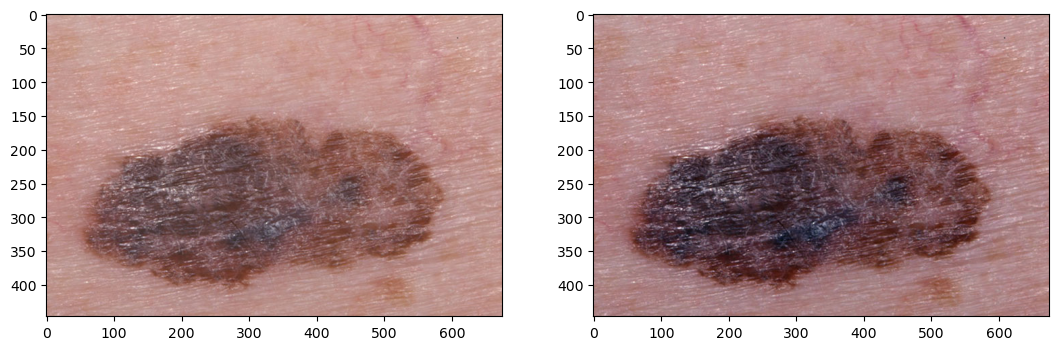

In [12]:
img2 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/melanoma/img1528.jpg')

imagen_final = channel_stretch(img2)

plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(img2)
plt.subplot(132); plt.imshow(imagen_final)
plt.show()

In [13]:
## Pre-trained Model VGG16
!pip install keras.applications.vgg16

ERROR: Could not find a version that satisfies the requirement keras.applications.vgg16 (from versions: none)
ERROR: No matching distribution found for keras.applications.vgg16


### Color Descriptors

C:\Users\dggua\AppData\Local\Temp\ipykernel_1528\57107206.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/dariers_disease/img145.jpg')
C:\Users\dggua\AppData\Local\Temp\ipykernel_1528\57107206.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/melanoma/img1528.jpg')


Text(0.5, 1.0, 'BLUE')

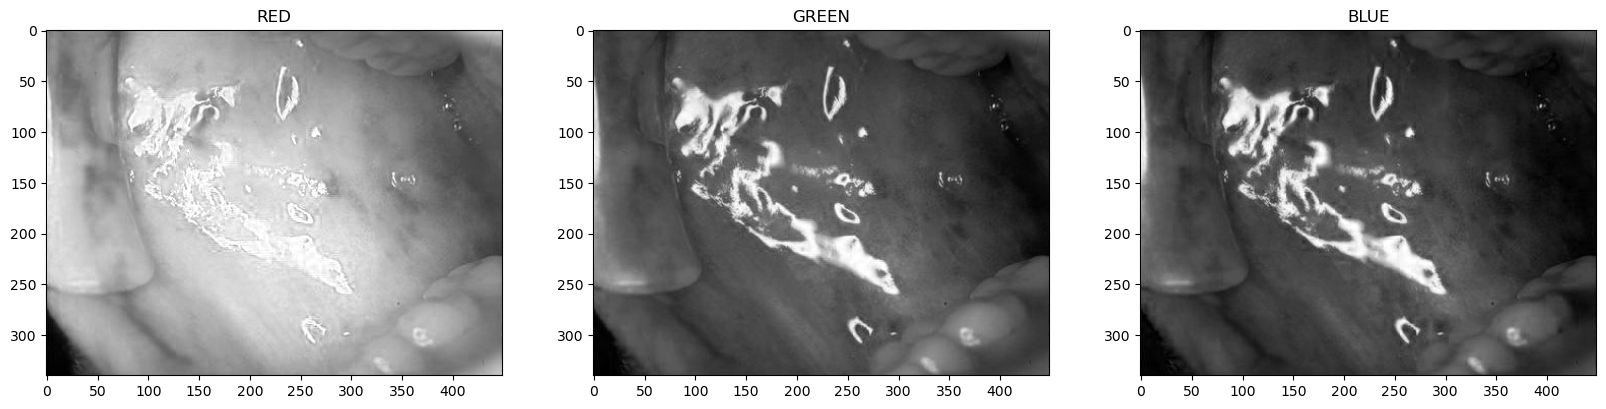

In [14]:
img1 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/dariers_disease/img145.jpg')
img2 = imageio.imread('C:/Users/dggua/Documents/DeepLearning/imgPrueba/melanoma/img1528.jpg')

plt.figure(figsize=(20,10))
plt.subplot(131) ; plt.imshow(img1[:,:,0], cmap='gray') ; plt.title('RED')
plt.subplot(132) ; plt.imshow(img1[:,:,1], cmap='gray') ; plt.title('GREEN')
plt.subplot(133) ; plt.imshow(img1[:,:,2], cmap='gray') ; plt.title('BLUE')

#### Color Stretching Examples

In [15]:
train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)

train_images_stretched = list(map(channel_stretch,train_images))
validation_images_stretched = channel_stretch(validation_images)


plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(train_images[10])
plt.subplot(132); plt.imshow(train_images_stretched[10])

NameError: name 'validation_generator' is not defined

## Feature Extraction

__`Step 3`__ Building the network

In [20]:


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1_weighted(true, pred): #shapes (batch, 4)

    #for metrics include these two lines, for loss, don't include them
    #these are meant to round 'pred' to exactly zeros and ones
    #predLabels = K.argmax(pred, axis=-1)
    #pred = K.one_hot(predLabels, 4) 


    ground_positives = K.sum(true, axis=0) + K.epsilon()       # = TP + FN
    pred_positives = K.sum(pred, axis=0) + K.epsilon()         # = TP + FP
    true_positives = K.sum(true * pred, axis=0) + K.epsilon()  # = TP
        #all with shape (4,)
    
    precision = true_positives / pred_positives 
    recall = true_positives / ground_positives
        #both = 1 if ground_positives == 0 or pred_positives == 0
        #shape (4,)

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        #still with shape (4,)

    weighted_f1 = f1 * ground_positives / K.sum(ground_positives) 
    weighted_f1 = K.sum(weighted_f1)

    
    return 1 - weighted_f1

In [21]:

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_3'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
validation_generator = test_datagen.flow_from_directory(
    validation_dit,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

#El generador produce lotes de imágenes de tamaño 150x150 (altura y ancho) y 3 (canales de color) y lotes de etiquetas de tamaño 30 (número de imágenes en el lote).


Found 19730 images belonging to 3 classes.
Found 3260 images belonging to 3 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 3)


In [22]:
IMG_SIZE = 200

resize_and_rescale = Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [23]:
IMG_SIZE = 200
model = models.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
model = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Output layer with 114 units and sigmoid activation

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy','Precision','Recall',f1_m,f1_weighted])

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size
)

model.save('Dermatology_problem_v1.h5')

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\1661183745.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10



154/154 [==============================] - 1686s 11s/step - loss: 1.0476 - accuracy: 0.7206 - precision: 0.7291 - recall: 0.6933 - f1_m: 0.6930 - f1_weighted: 0.4464 - val_loss: 0.7669 - val_accuracy: 0.7303 - val_precision: 0.7303 - val_recall: 0.7303 - val_f1_m: 0.7303 - val_f1_weighted: 0.4336
Epoch 2/10
154/154 [==============================] - 1450s 9s/step - loss: 0.7674 - accuracy: 0.7288 - precision: 0.7330 - recall: 0.7219 - f1_m: 0.7263 - f1_weighted: 0.4269 - val_loss: 0.7551 - val_accuracy: 0.7275 - val_precision: 0.7284 - val_recall: 0.7275 - val_f1_m: 0.7280 - val_f1_weighted: 0.4268
Epoch 3/10
154/154 [==============================] - 1453s 9s/step - loss: 0.7585 - accuracy: 0.7298 - precision: 0.7362 - recall: 0.7193 - f1_m: 0.7260 - f1_weighted: 0.4234 - val_loss: 0.7542 - val_accuracy: 0.7284 - val_precision: 0.7303 - val_recall: 0.7278 - val_f1_m: 0.7290 - val_f1_weighted: 0.4153
Epoch 4/10
154/154 [==============================] - 1471s 10s/step - loss: 0.7514 - 

C:\Users\dggua\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


__`Step 3`__ Model Fitting

##### Identify corrupted image files

In [146]:
def delete_corrpted_images():
#Images corrupted image files, unsupported image formats, or incorrect file paths 

 for label in labels:
    label_dir = os.path.join(validation_dit, label)
    for fname in os.listdir(label_dir):
        try:
            img = cv2.imread(os.path.join(label_dir, fname))
            if img is None:
                print('File {} is not a valid image file'.format(fname), label)
        except:
            print('File {} is not a valid image file'.format(fname), label)


In [429]:

#tf.keras.backend.clear_session()

__`Step 4`__ Plot metrics

In [980]:
def Plot_Metrics():
    #Now we will plot the training and validation accuracy and loss
    metric = 'accuracy' #sensitivity, specificity, precision, recall, f1-score can also be used
    acc = history.history[metric]
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    print(test_datagen)
    #Now we will evaluate the model on the test set
    #test_loss, test_acc = model.evaluate_generator(test_datagen, steps=50)
    #print('test acc:', test_acc)

    #Now we will make predictions on the test set
    predictions = model.predict_generator(validation_generator, steps=50)
    print(predictions)


## Run the first Model to check the results

In [1]:

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_3'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
validation_generator = test_datagen.flow_from_directory(
    validation_dit,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

#El generador produce lotes de imágenes de tamaño 150x150 (altura y ancho) y 3 (canales de color) y lotes de etiquetas de tamaño 30 (número de imágenes en el lote).


NameError: name 'os' is not defined

In [1374]:
#Creating Predictions
predictions = model.predict_generator(test_generator,  verbose = 1)

C:\Users\dggua\AppData\Local\Temp\ipykernel_10776\846870615.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,  verbose = 1)


27/27 [==============================] - 188s 7s/step


In [1377]:
predictions[0]

array([0.18996486, 0.59574866, 0.21428649], dtype=float32)

In [1378]:
#Checking how many rights and wrongs prediction we got
points = 0
points_w = 0
c = 0
class_indices = train_generator.classes
at = []
for i in predictions: 
    random_num = round(random.uniform(0, 1), 8)
    classi = 0
    if(random_num <= i[0]):
        classi = 0
    elif((random_num > i[0]) and (random_num<=(i[1]+i[0]))):
        classi = 1
    else:
        classi = 2
    if(classi==class_indices[c]):
        points+=1
        at.append(classi)
    else:
        points_w+=1
        at.append(4)
    c+=1

print(points, points_w)
print(points/(points+points_w))
print(Counter(at))
print(Counter(class_indices))

849 2552
0.24963246104087033
Counter({4: 2552, 1: 502, 0: 347})
Counter({1: 14374, 0: 2700, 2: 2656})


## Run the Models for belign, Malignant and non-neoplastic
 ##### take in mind if there is a problem please run:
    #### tf.keras.backend.clear_session()

In [1908]:
tf.keras.backend.clear_session()

In [25]:
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_b'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

In [26]:

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_b'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
validation_generator = test_datagen.flow_from_directory(
    validation_dit,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

#El generador produce lotes de imágenes de tamaño 150x150 (altura y ancho) y 3 (canales de color) y lotes de etiquetas de tamaño 30 (número de imágenes en el lote).


Found 2656 images belonging to 24 classes.
Found 436 images belonging to 24 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 24)


In [27]:
train_generator.class_indices.keys()

dict_keys(['becker_nevus', 'congenital_nevus', 'dermatofibroma', 'disseminated_actinic_porokeratosis', 'epidermal_nevus', 'fordyce_spots', 'granuloma_pyogenic', 'halo_nevus', 'lymphangioma', 'milia', 'mucous_cyst', 'naevus_comedonicus', 'nevocytic_nevus', 'nevus_sebaceous_of_jadassohn', 'pilar_cyst', 'pilomatricoma', 'porokeratosis_actinic', 'porokeratosis_of_mibelli', 'port_wine_stain', 'prurigo_nodularis', 'pyogenic_granuloma', 'seborrheic_keratosis', 'syringoma', 'telangiectases'])

In [28]:
IMG_SIZE = 200
model2 = models.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
model2 = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(24, activation='softmax'))  # Output layer with 114 units and sigmoid activation

model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy','Precision','Recall',f1_m,f1_weighted])

In [29]:
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size
)

model2.save('Dermatology_problem_v1_b.h5')

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\2294588897.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(


Epoch 1/20
20/20 [==============================] - 224s 11s/step - loss: 3.6800 - accuracy: 0.0653 - precision: 0.0547 - recall: 0.0028 - f1_m: 0.0027 - f1_weighted: 0.9557 - val_loss: 3.1281 - val_accuracy: 0.0703 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9527
Epoch 2/20
20/20 [==============================] - 190s 9s/step - loss: 3.1418 - accuracy: 0.0783 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - f1_weighted: 0.9521 - val_loss: 3.1317 - val_accuracy: 0.0703 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9527
Epoch 3/20
20/20 [==============================] - 184s 9s/step - loss: 3.1360 - accuracy: 0.0803 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - f1_weighted: 0.9516 - val_loss: 3.1112 - val_accuracy: 0.0755 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9515
Epoch 4/20
20/20 [======

In [31]:
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_n'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
validation_generator = test_datagen.flow_from_directory(
    validation_dit,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 14374 images belonging to 79 classes.
Found 2376 images belonging to 79 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 79)


In [33]:
IMG_SIZE = 200
model3 = models.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
model3 = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(79, activation='softmax'))  # Output layer with 114 units and sigmoid activation

model3.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy','Precision','Recall',f1_m,f1_weighted])

In [34]:
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size
)

model3.save('Dermatology_problem_v1_n.h5')

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\494932761.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(


Epoch 1/15
112/112 [==============================] - 1212s 11s/step - loss: 4.2005 - accuracy: 0.0523 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - f1_weighted: 0.9790 - val_loss: 4.1395 - val_accuracy: 0.0556 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9775
Epoch 2/15
112/112 [==============================] - 1034s 9s/step - loss: 4.1505 - accuracy: 0.0543 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - f1_weighted: 0.9782 - val_loss: 4.1668 - val_accuracy: 0.0556 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9797
Epoch 3/15
112/112 [==============================] - 1027s 9s/step - loss: 4.1361 - accuracy: 0.0537 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - f1_weighted: 0.9777 - val_loss: 4.1181 - val_accuracy: 0.0516 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.9778
Epo

In [35]:
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_m'
#Directories for the training, validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
# os.mkdir(train_dir)
validation_dit = os.path.join(original_dataset_dir, 'validation')
# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)
    

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True)

# Now, use flow_from_directory without specifying preprocessing_function again

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

    
validation_generator = test_datagen.flow_from_directory(
    validation_dit,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

print(type(train_generator))
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2700 images belonging to 11 classes.
Found 448 images belonging to 11 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 11)


In [37]:
IMG_SIZE = 200
model4 = models.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
model4 = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(11, activation='softmax'))  # Output layer with 114 units and sigmoid activation

model4.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy','Precision','Recall',f1_m,f1_weighted])

In [38]:
history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size
)

model4.save('Dermatology_problem_v1_m.h5')

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\1713391298.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(


Epoch 1/20
21/21 [==============================] - 229s 11s/step - loss: 3.7929 - accuracy: 0.2274 - precision: 0.2081 - recall: 0.0358 - f1_m: 0.0368 - f1_weighted: 0.8699 - val_loss: 2.1746 - val_accuracy: 0.2422 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.8589
Epoch 2/20
21/21 [==============================] - 193s 9s/step - loss: 2.1946 - accuracy: 0.2508 - precision: 0.4091 - recall: 0.0035 - f1_m: 0.0059 - f1_weighted: 0.8556 - val_loss: 2.1445 - val_accuracy: 0.2083 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.8585
Epoch 3/20
21/21 [==============================] - 193s 9s/step - loss: 2.1625 - accuracy: 0.2481 - precision: 0.1250 - recall: 3.8880e-04 - f1_m: 7.0028e-04 - f1_weighted: 0.8553 - val_loss: 2.1522 - val_accuracy: 0.2474 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_f1_weighted: 0.8613
Epoch 4/20
21/21 [======================

## Run the whole project to review the answers

In [39]:
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_3'

test_dir = os.path.join(original_dataset_dir, 'test')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

Found 3401 images belonging to 3 classes.


#### First Prediction

In [40]:
predictions = model.predict_generator(test_generator,  verbose = 1)

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\3388676779.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,  verbose = 1)


27/27 [==============================] - 144s 5s/step


In [41]:
len(predictions)

3401

#### Seperate the predictions into the three classes through getting the max

In [42]:

a1 = []
a2 = []
a3 = []
atotal = []
for i in predictions:
    
    c=0
    for j in i:
        if(j==max(i)):
            if(c==0):
                a1.append(j)
                atotal.append(0)
            elif(c==1):
                a2.append(j)
                atotal.append(1)
            else:
                a3.append(j)
                atotal.append(2)
        c+=1

#### Counting how many got right and wrong and saving it in at if is right then either 0, 1, 2 been the classification of the three
#### If wrong is 4

In [43]:
points = 0
points_w = 0
class_indices = test_generator.classes

at = []
a = len(atotal)
for i in range(0, a):
    if(atotal[i]==class_indices[i]):
        points+=1
        at.append(atotal[i])
    else:
        points_w+=1
        at.append(4)
        
print(points, points_w)
print(points/(points+points_w))
print(Counter(at))

2394 1007
0.7039106145251397
Counter({2: 2374, 4: 1007, 1: 20})


#### The same as last two steps but this is done based on the probability given in the prediction

In [44]:
points = 0
points_w = 0
c = 0
at = []
y_pred = []
for i in predictions: 
    random_num = round(random.uniform(0, 1), 8)
    classi = 0
    if(random_num <= i[0]):
        classi = 0
    elif((random_num > i[0]) and (random_num<=(i[1]+i[0]))):
        classi = 1
    else:
        classi = 2
    if(classi==class_indices[c]):
        points+=1
        at.append(classi)
    else:
        points_w+=1
        at.append(4)
    y_pred.append(classi)
    c+=1



#bb
f1 = f1_score(class_indices, y_pred, average='macro')
print(points, points_w)
print('accuracy: ',points/(points+points_w))
print('f1:', f1)
print(Counter(at))
print(Counter(class_indices))

2057 1344
accuracy:  0.6048221111437813
f1: 0.33796249803822836
Counter({2: 1951, 4: 1344, 0: 57, 1: 49})
Counter({2: 2472, 0: 467, 1: 462})


#### Saving each of the batch images on a test array, test_b for belign, test_m for Malignant, test_n for non-neoplastic

In [45]:
test_b = []
test_m = []
test_n = []
test_error = []
count = 0
print(Counter(at))
rangee = test_generator.samples
print(rangee/128)
for i in range(0,27):
    batch_x, batch_y = test_generator[i]
    for j in range(0, len(batch_x)):
        if(at[count]==0):
            test_b.append(batch_x[j])
        elif(at[count]==1):
            test_m.append(batch_x[j])
        elif(at[count]==2):
            
            test_n.append(batch_x[j])
        else:
            test_error.append(batch_x[j])
        count+=1

Counter({2: 1951, 4: 1344, 0: 57, 1: 49})
26.5703125


In [47]:
print(count)
print(len(test_b),len(test_m),len(test_n))


3401
57 49 1951


#### Optain the file names of each of the results. 

In [48]:
file_names = test_generator.filenames
len(at)

3401

In [49]:

dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img'

test_dir = os.path.join(original_dataset_dir, 'test')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    
)

Found 3401 images belonging to 114 classes.


#### From the original data set find the name of the files and check which is the sub class it belongs to in this case which label
#### From there we save it on an array to save their corresponding label

In [50]:
test_label_b = []
test_label_m = []
test_label_n = []
test_label_error=[]
test_classes = test_generator.classes
file_new_names = test_generator.filenames
for i in range(0, len(file_new_names)):
    word = file_names[i].split("\\")[1]
    completeword = [s for s in file_new_names if word in s]
    if(at[i]==0):
        test_label_b.append(completeword[0].split("\\")[0])
    elif(at[i]==1):
        test_label_m.append(completeword[0].split("\\")[0])
    elif(at[i]==2):
        test_label_n.append(completeword[0].split("\\")[0])
    else:
        test_label_error.append(completeword[0].split("\\")[0])

In [51]:
print(len(test_label_b), len(test_label_m), len(test_label_n))

57 49 1951


##### Now we optain the information from the folder of image belign

In [52]:
#### First Model. 
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_b'
#Directories for the training, validation and test splits

# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

Found 467 images belonging to 24 classes.


#### Here we convert the label to binary like [0, 0, 0, 1]

In [53]:
class_indices_b = test_generator.class_indices
test_label_b_bin = []

for i in test_label_b:
    ii = i
    ind = class_indices_b[ii]
    array = np.zeros(24)
    array[ind] = 1
    test_label_b_bin.append(array)

#### We create our data imagery with the images and labels

In [54]:
test_b = np.array(test_b)
print(len(test_b))

test_generator_b = test_datagen.flow(
    x=test_b,
    y=test_label_b_bin,
    batch_size=128,
)

57


#### Prediction

In [55]:
predictions22 = model2.predict_generator(test_generator_b,  verbose = 1)

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\2249938597.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions22 = model2.predict_generator(test_generator_b,  verbose = 1)


1/1 [==============================] - 2s 2s/step


#### Assign the labels 

In [57]:
b_answer = []
print(predictions22[0])
y_pred = []

for i in predictions22:
    c=0
    random_num = round(random.uniform(0, 1), 8)
    random.shuffle(i)
    c = 0
    m = 0
    for j in i:
        c+= j
        if(random_num<=c):
            b_answer.append(m-1)
            break
        m+=1
print(Counter(b_answer))

print(len(b_answer))

[1.3722775e-05 5.4736453e-04 1.0823730e-03 6.9612749e-02 5.9225131e-03
 4.1214842e-03 2.9216907e-03 5.2480817e-01 2.1112757e-03 5.7951105e-04
 1.1633346e-01 8.0551198e-03 3.8829322e-03 9.8589636e-02 2.4917714e-02
 3.4294818e-02 1.4522140e-06 5.9898250e-04 1.4103074e-03 1.5471301e-04
 9.1186929e-03 5.5088061e-03 8.4991328e-02 4.2131628e-04]
Counter({2: 5, 4: 5, 21: 4, 16: 4, 6: 4, 15: 4, 14: 3, 3: 3, 11: 3, 10: 3, 8: 3, 18: 2, 13: 2, 7: 2, 17: 2, 0: 2, 9: 1, 22: 1, 19: 1, -1: 1, 5: 1, 20: 1})
57


#### Check how many got right and wrong

In [60]:
points = 0
points_w = 0
a = len(b_answer)
print(a)
y_true = []
print(len(test_label_b_bin))
for i in test_label_b_bin:
    for j in range(0,len(i)):
        if i[j] == 1:
            y_true.append(j)
print(len(y_true))    
for i in range(0, a):
    if(y_true[i]==b_answer[i]):
        points+=1
    else:
        points_w+=1

f1 = f1_score(y_true, b_answer, average='macro')
print(points, points_w)
print('accuracy: ',points/(points+points_w))   
print('f1_m', f1)


57
57
57
0 57
accuracy:  0.0
f1_m 0.0


##### Same Steps to the next model for  non-neoplastic

In [61]:
###Second Model###########
#### First Model. 
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_n'
#Directories for the training, validation and test splits

# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

Found 2472 images belonging to 79 classes.


In [62]:
class_indices_n = test_generator.class_indices
test_label_n_bin = []

for i in test_label_n:
    ind = class_indices_n[i]
    array = np.zeros(79)
    array[ind] = 1
    test_label_n_bin.append(array)

In [63]:
test_n = np.array(test_n)
test_generator_n = test_datagen.flow(
    x=test_n,
    y=test_label_n_bin,
    batch_size=128,
)

In [64]:
predictions3 = model3.predict_generator(test_generator_n,  verbose = 1)

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\595569640.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions3 = model3.predict_generator(test_generator_n,  verbose = 1)


16/16 [==============================] - 47s 3s/step


In [71]:
n_answer = []

y_pred = []

for i in predictions3:
    c=0
    random_num = round(random.uniform(0, 1), 8)
    random.shuffle(i)
    c = 0
    m = 0
    for j in i:
        c+= j
        if(random_num<=c):
            n_answer.append(m-1)
            break
        m+=1
print(Counter(n_answer))

print(len(n_answer))

Counter({49: 38, 5: 35, 32: 34, 19: 34, 50: 33, 41: 33, 6: 32, 30: 31, 29: 31, 9: 30, 38: 30, 73: 29, 60: 29, 51: 29, 42: 29, 20: 29, -1: 28, 11: 28, 0: 28, 28: 28, 22: 28, 65: 27, 56: 27, 43: 27, 58: 27, 55: 27, 72: 27, 31: 26, 76: 26, 37: 26, 54: 26, 53: 26, 39: 25, 68: 25, 45: 25, 57: 24, 4: 24, 75: 24, 15: 24, 33: 24, 34: 24, 71: 24, 48: 24, 59: 24, 77: 24, 12: 23, 2: 23, 24: 23, 66: 23, 64: 23, 14: 23, 40: 23, 7: 22, 69: 22, 10: 22, 36: 22, 67: 22, 44: 22, 3: 22, 46: 22, 25: 22, 8: 22, 1: 21, 18: 21, 13: 21, 21: 20, 74: 20, 70: 19, 26: 19, 62: 19, 17: 19, 47: 18, 61: 18, 35: 18, 52: 18, 16: 17, 63: 17, 27: 16, 23: 16})
1951


#### Result how many right and wrongs

In [72]:
points = 0
points_w = 0
a = len(n_answer)

y_true = []

for i in test_label_n_bin:
    for j in range(0,len(i)):
        if i[j] == 1:
            y_true.append(j)
print(len(y_true))    
for i in range(0, a):
    if(y_true[i]==n_answer[i]):
        points+=1
    else:
        points_w+=1

f1 = f1_score(y_true, n_answer, average='macro')
print(points, points_w)
print('accuracy: ',points/(points+points_w))   
print('f1_m', f1)


1951
20 1931
accuracy:  0.010251153254741158
f1_m 0.00935697037718827


##### For Last model Malignant

In [73]:
###Third Model###########
#### First Model. 
#This is the directory where the images are stored 
dw_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/imgPrueba'

#This is the directory where the images will be stored after the split
original_dataset_dir = 'C:/Users/dggua/Documents/DeepLearning/img_m'
#Directories for the training, validation and test splits

# os.mkdir(validation_dit)
test_dir = os.path.join(original_dataset_dir, 'test')
# os.mkdir(test_dir)

train_datagen = ImageDataGenerator(rescale=1./255
                                   , rotation_range=40
                                   , width_shift_range=0.05
                                   , height_shift_range=0.05
                                   , shear_range=0.1
                                   , zoom_range=0.2
                                   , horizontal_flip=True
                                  
                                   #, fill_mode='nearest'
                                   )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200), # This might be resize () Increase the size. (485-364), yeah change it to square?
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical'
)

Found 462 images belonging to 11 classes.


In [74]:
class_indices_m = test_generator.class_indices
test_label_m_bin = []

for i in test_label_m:
    ind = class_indices_m[i]
    array = np.zeros(11)
    array[ind] = 1
    test_label_m_bin.append(array)

In [75]:
test_m = np.array(test_m)
test_generator_m = test_datagen.flow(
    x=test_m,
    y=test_label_m_bin,
    batch_size=128,
)

In [76]:
predictions4 = model4.predict_generator(test_generator_m,  verbose = 1)

C:\Users\dggua\AppData\Local\Temp\ipykernel_20580\3950755775.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions4 = model4.predict_generator(test_generator_m,  verbose = 1)


1/1 [==============================] - 1s 1s/step


In [77]:
m_answer = []

y_pred = []

for i in predictions4:
    c=0
    random_num = round(random.uniform(0, 1), 8)
    random.shuffle(i)
    c = 0
    m = 0
    for j in i:
        c+= j
        if(random_num<=c):
            m_answer.append(m)
            break
        m+=1
print(Counter(m_answer))

print(len(n_answer))

Counter({3: 8, 8: 6, 10: 6, 5: 6, 9: 5, 1: 5, 6: 5, 4: 3, 2: 2, 0: 2, 7: 1})
1951


#### Result

In [78]:
points = 0
points_w = 0
a = len(m_answer)

y_true = []

for i in test_label_m_bin:
    for j in range(0,len(i)):
        if i[j] == 1:
            y_true.append(j)
print(len(y_true))    
for i in range(0, a):
    if(y_true[i]==m_answer[i]):
        points+=1
    else:
        points_w+=1
print(len(m_answer))
f1 = f1_score(y_true, m_answer, average='macro')
print(points, points_w)
print('accuracy: ',points/(points+points_w))   
print('f1_m', f1)


49
49
1 48
accuracy:  0.02040816326530612
f1_m 0.0202020202020202
